# Python Data Analisys and Visualization


## O que veremos?
* Dados?
    * onde conseguir
    * como importar
    
* Limpando, manipulando e validando
* Entendendo os dados
* Respondendo as perguntas que temos

### Dados?

Neste curso usaremos dados publicos providos pela [Operação Serenata de Amor](https://serenatadeamor.org/), que captura e processa os dados de senadores e deputados.

Você pode ver o ultimo relatorio dessa operação [aqui](https://medium.com/data-science-brigade/relat%C3%B3rio-mensal-da-opera%C3%A7%C3%A3o-serenata-de-amor-008-88c40c0930cd).

Para usar os dados do serenata você pode instalar o [serenata-toolbox](https://github.com/datasciencebr/serenata-toolbox). Para instalar você pode fazer:

    $ pip install git+https://github.com/datasciencebr/serenata-toolbox.git#egg=serenata-toolbox

Depois podemos baixar os dados de reembolso dos nossos senadores assim:

In [ ]:
from serenata_toolbox.datasets import Datasets
from serenata_toolbox.federal_senate.federal_senate_dataset import FederalSenateDataset
dataset_dir = '.'

senate = FederalSenateDataset(dataset_dir)
senate.fetch()
senate.translate()
senate.clean()

Ele vai baixar um arquivo compactado com os dados do senado desde 2009, mas como isso demora um pouco, nós vamos usar o arquivo **federal-senate-2016** que eu ja disponibilizei aqui.

In [1]:
import pandas
df = pandas.read_csv("/dados/federal-senate-2016")
df.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


Com pandas podemos importar arquivos de varios formatos e transforma-los em Data Frames, que são um formato de dados tabular com linhas e colunas indexaveis.

-----------------------------------

### lendo html

In [2]:
brasileirao = pandas.read_html("brasileirao2016.html", encoding="utf-8")[0]
brasileirao.head()

,Club,Position in 2016,First season in top division,Seasons in Taça Brasil,Seasons in Robertão,Seasons in Brasileirão,Top division titles,Last top division title
0,Atlético Goianiense,1st in Série B,1965,2,0,8,0,NaN
1,Atlético Mineiro,4th,1959,4,4,46,1,1971.0
2,Atlético Paranaense,6th,1959,1,2,38,1,2001.0
3,Avaí,2nd in Série B,1974,0,0,9,0,NaN
4,Bahia,4th in Série B,1962,6,3,36,2,1988.0


---------------------

Depois de importarmos os dados, vamos conhece-lo melhor.

In [3]:
# (linhas, colunas)
df.shape

(26691, 10)

In [4]:
df.columns



Index(['year', 'month', 'congressperson_name', 'expense_type', 'cnpj_cpf',
       'supplier', 'document_id', 'date', 'expense_details',
       'reimbursement_value'],
      dtype='object')

In [5]:
# tipo de cada coluna
df.dtypes

year                    int64
month                   int64
congressperson_name    object
expense_type           object
cnpj_cpf               object
supplier               object
document_id            object
date                   object
expense_details        object
reimbursement_value    object
dtype: object

In [6]:
# os primeiros 5 elementos do Data Frame
df.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [7]:
df.mean()

year     2016.000000
month       6.470908
dtype: float64

-------------
Opa, temos um problema. Não foi gerado media para a coluna de `reimbursement_value`, porque ela não é está representada como um tipo numerico, e sim como object.

Teremos que transforma-la em uma coluna tipo `float64`

In [8]:
df.reimbursement_value = df.reimbursement_value.str.replace(",", ".")

In [9]:
df.reimbursement_value = df.reimbursement_value.astype(float)

In [10]:
df.reimbursement_value.head()

0      73.60
1     206.84
2    6000.00
3     407.48
4     550.00
Name: reimbursement_value, dtype: float64

----------
Pronto, agora vamos verificar se deu certo.

In [11]:
df.mean()

year                   2016.000000
month                     6.470908
reimbursement_value     947.484513
dtype: float64

------------
As medias das colunas `month` e `year` não importam pra gente, então vamos olhar só pra coluna de reembolso.
Com pandas podemos pegar varias estatisticas que descrevem uma distribuição.

In [12]:
df.reimbursement_value.mean()

947.48451313176724

In [13]:
df.reimbursement_value.median()

324.79

In [14]:
df.reimbursement_value.mode()

0    100.0
dtype: float64

In [15]:
df.reimbursement_value.std()

2733.8200368509724

In [16]:
df.reimbursement_value.var()

7473771.9938878519

In [17]:
df.reimbursement_value.max()

256980.0

In [18]:
df.reimbursement_value.min()

0.01

-------------
### estatisticas descritivas
São metricas que nos ajudam a entender uma distribuição de valores, nesse caso os dados de reembolso dos nossos senadores.

- Media: soma dos valores / quantidade de valores
- Mediana: valor que divide a distribuição ao meio. Tambem pode ser referenciada como percentil 50.
- Moda: valor mais frequente da distribuição
- Desvio Padrão: valor mais comum de variação da media
- Variancia: mostra a dispersão quadratica da distribuição. Quanto maior mais dispersa é a distribuição.
- Max: valor mais alto da distribuição
- Min: valor mais baixo da distribuição

In [19]:
# podemos ver essas metricas juntas
df.reimbursement_value.describe()

count     26691.000000
mean        947.484513
std        2733.820037
min           0.010000
25%         124.000000
50%         324.790000
75%         956.865000
max      256980.000000
Name: reimbursement_value, dtype: float64

----------
Outra parte importante da analise é saber se seus dados estão completos e, se incompletos, podem ser usados.
No caso desses dados, temos alguns dados faltando mas isso não vai impactar na analise que faremos aqui.

In [20]:
# quantos dados não estão nulos no seu DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 10 columns):
year                   26691 non-null int64
month                  26691 non-null int64
congressperson_name    26691 non-null object
expense_type           26691 non-null object
cnpj_cpf               26691 non-null object
supplier               26691 non-null object
document_id            24647 non-null object
date                   26691 non-null object
expense_details        21308 non-null object
reimbursement_value    26691 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.0+ MB


-------------
Quem pediu o maior reembolso e quem pediu o menor?

In [21]:
df.loc[df.reimbursement_value.idxmax()]

year                                                        2016
month                                                         12
congressperson_name                              DAVI ALCOLUMBRE
expense_type                 Publicity of parliamentary activity
cnpj_cpf                                      04.953.008/0001-23
supplier               ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME
document_id                                                  202
date                                                  22/03/2017
expense_details                                              NaN
reimbursement_value                                       256980
Name: 4637, dtype: object

In [22]:
df.loc[df.reimbursement_value.idxmin()]

year                                                                2016
month                                                                  3
congressperson_name                              FERNANDO BEZERRA COELHO
expense_type                      National air, water and land transport
cnpj_cpf                                              07.575.651/0001-59
supplier                                                             GOL
document_id                                                       NFPJ4Z
date                                                          22/03/2016
expense_details        Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...
reimbursement_value                                                 0.01
Name: 6847, dtype: object

----------------

## Conhecendo mais dos dados

Estes numeros sozinhos não dizem muita coisa, por isso vamos plotar alguns graficos para nos ajudar a entender melhor o que eles representam.

In [23]:
import matplotlib
# essa linha serve para exibir os graficos direto no jupyter notebook
% matplotlib inline
matplotlib.style.use('ggplot') # graficos mais bonitos com ggplot

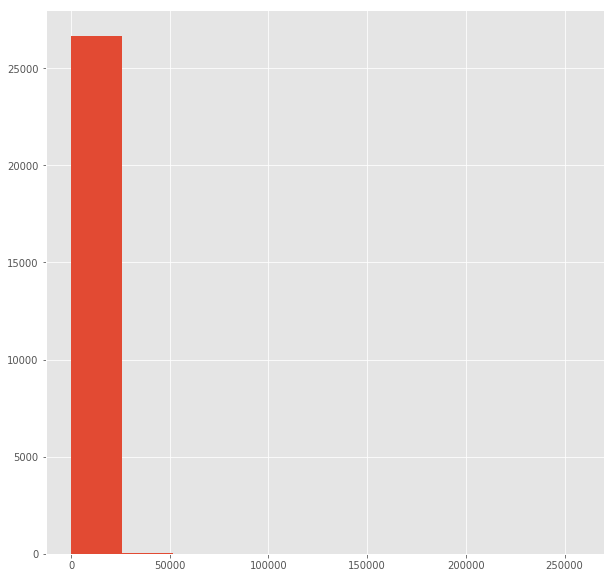

In [24]:
df.reimbursement_value.hist(figsize=(10,10))

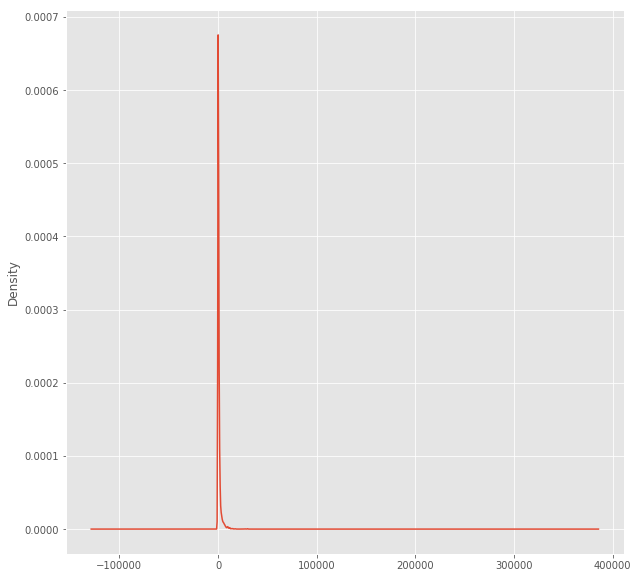

In [25]:
df.reimbursement_value.plot(kind="density", figsize=(10,10))

Não ajudou muito pois nossa distribuição é muito esparsa. Podemos pegar um `sample` da distribuição para tentar entende-la melhor

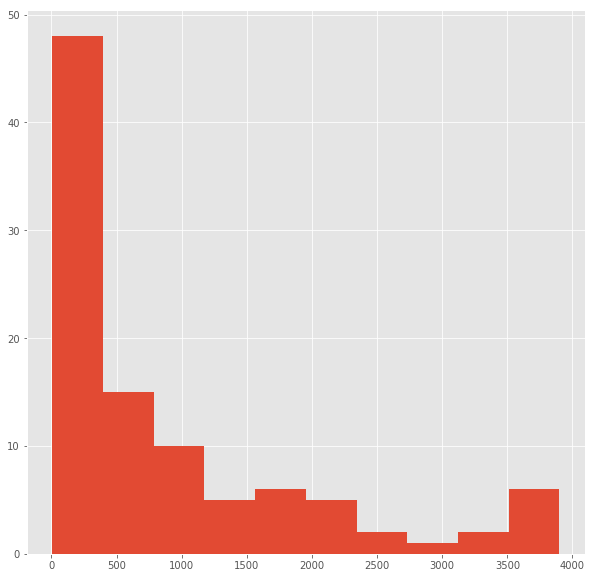

In [26]:
df.sample(100).reimbursement_value.hist(figsize=(10,10))

Melhorou bastante, mas ainda podemos melhorar.

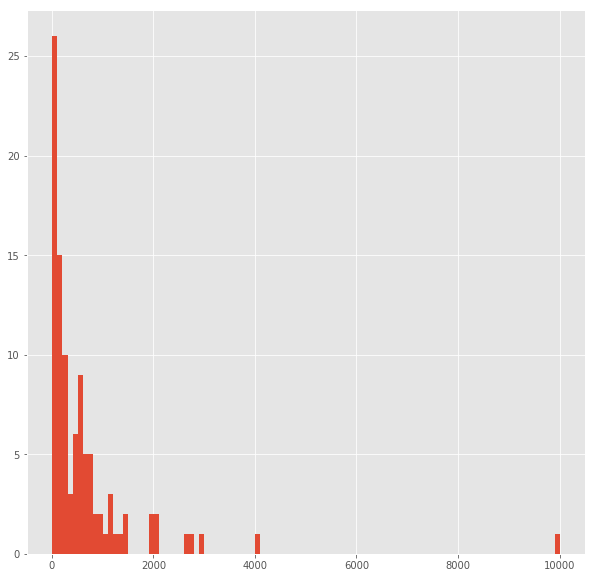

In [27]:
# bin é uma coluna do histograma que tem um range de valor. Quanto mais bins, menor esse range.
df.sample(100).reimbursement_value.hist(figsize=(10,10), bins=100)

-------------
Vimos que os valores são bem dispersos, mas podemos fazer analises especificas.

Vamos ver como os gastos estão distribuidos por mês

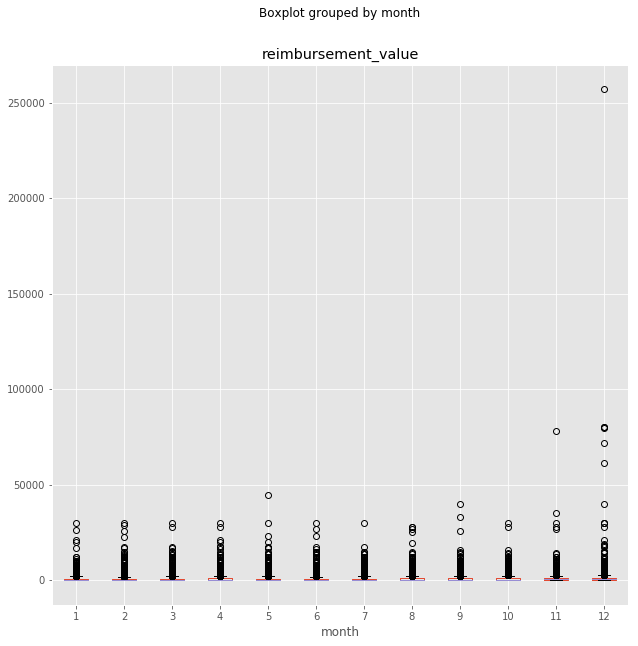

In [28]:
df.boxplot(column="reimbursement_value", by="month", figsize=(10,10))

---------
Os graficos dessa distribuição não nos ajudam muito, pois estão muito dispersos, mas podemos aplicar uma transformação para que os dados sejam mais faceis de visualizar.

Podemos aplicar diversas transformações, e nesse caso vamos usar raiz quadrada pois nao queremos dados negativos.

In [29]:
import numpy
from matplotlib import pyplot
df_sqrt = df.copy()
df_sqrt.reimbursement_value = df.reimbursement_value.apply(numpy.sqrt)

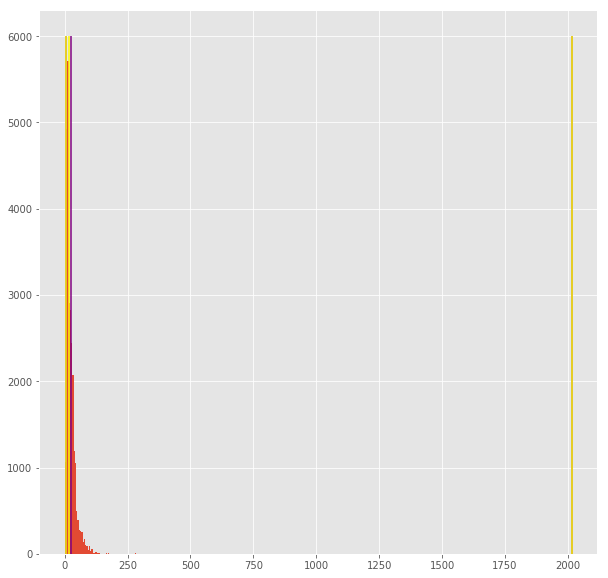

In [30]:
df_sqrt.reimbursement_value.hist(figsize=(10,10), bins=100)
pyplot.vlines(df_sqrt.mean(), # Plot black line at mean
              ymin=0,
              ymax=6000,
              color="purple")

pyplot.vlines(df_sqrt.median(), # Plot red line at median
            ymin=0,
            ymax=6000,
            color="yellow")

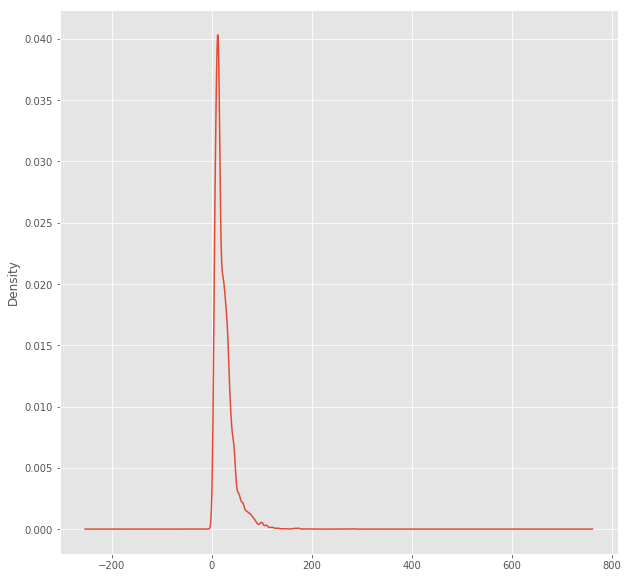

In [31]:
df_sqrt.reimbursement_value.plot(kind="density", figsize=(10,10))

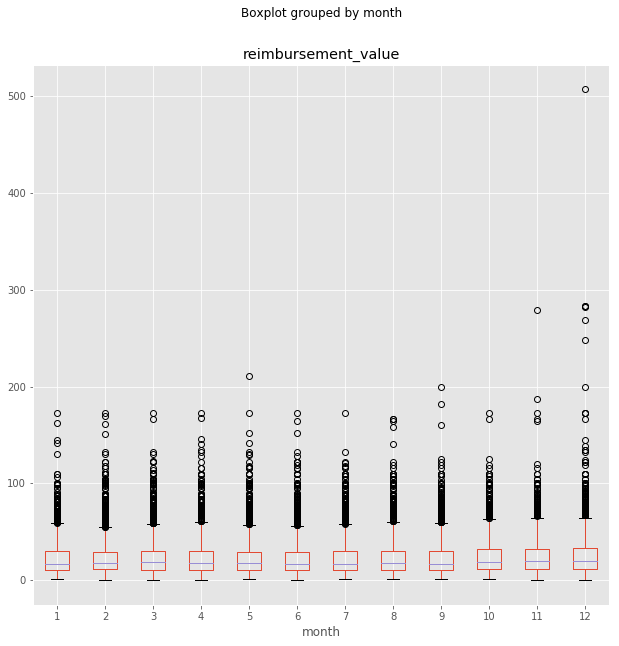

In [32]:
df_sqrt.boxplot(column="reimbursement_value", by="month", figsize=(10,10))

Podemos notar que muitos valores altos, fugindo do padrão da distribuição, chamamos esses valores de outliers.

Outliers mexem com a media e outras estatisticas, as vezes até podem atrapalhar a avaliação dos dados.

----------------

Vamos ver os reembolsos agrupados pelos meses e senadores.

Assim conseguimos dizer quem gastou mais num ano e num mês.

In [33]:
bymonth = df.groupby(["month"])
bysenator = df.groupby(["congressperson_name"])

In [34]:
# agora sabemos as estatisticas por mês
bymonth.reimbursement_value.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1550.0,943.931329,1963.071017,1.70,111.1200,268.510,908.3150,30000.00
2,2127.0,929.316794,2041.279175,0.30,130.0000,329.090,839.9050,30000.00
3,2546.0,893.277565,1818.623741,0.01,120.0000,345.820,900.0000,30000.00
4,2367.0,887.507533,1871.631119,0.37,116.8850,305.630,935.9450,30000.00
5,2422.0,885.057981,2031.555902,3.00,115.0325,317.645,876.2500,44500.00
6,2562.0,862.780254,1816.950951,0.01,120.6800,300.695,856.2475,30000.00
7,2360.0,888.361089,1725.941843,3.60,123.8875,300.000,901.4800,30000.00
8,2462.0,904.189886,1888.202808,2.40,119.3250,321.450,947.7100,27655.07
9,2343.0,890.552548,1927.864138,2.40,120.0000,273.400,927.2800,40000.00


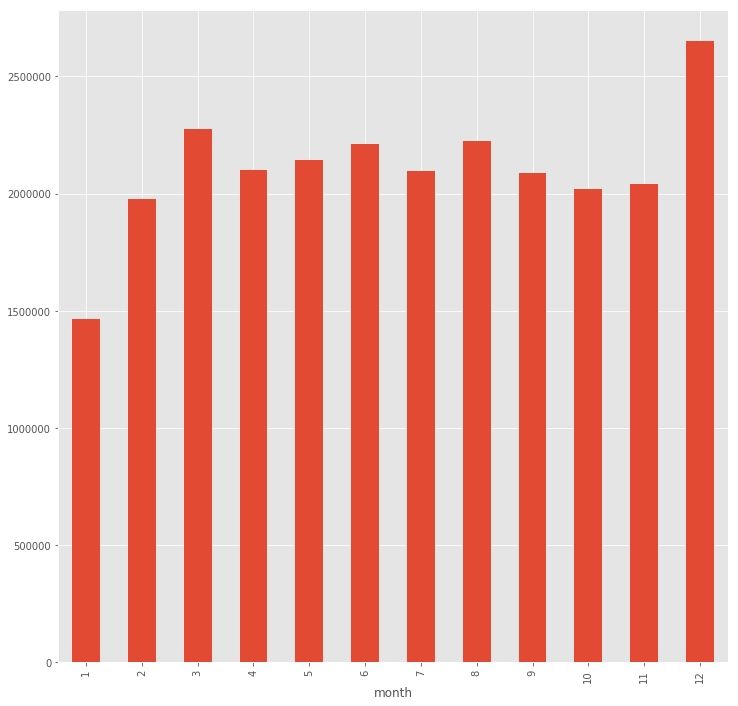

In [35]:
# valores gastos por mês
s = bymonth.reimbursement_value.sum()
s.plot.bar(figsize=(12,12))

In [36]:
bysenator.reimbursement_value.describe()

,count,mean,std,min,25%,50%,75%,max
congressperson_name,,,,,,,,
ACIR GURGACZ,140.0,2156.934857,2864.690150,40.00,591.3275,1547.590,2084.8775,19800.00
ALOYSIO NUNES FERREIRA,432.0,661.846296,1357.902019,5.55,104.4000,178.485,777.6025,8266.00
ALVARO DIAS,150.0,886.473000,435.867230,178.00,541.0450,795.505,1120.8400,2196.25
ANA AMÉLIA,397.0,420.882695,498.887655,8.00,72.4900,195.000,628.8600,2759.21
ANTONIO ANASTASIA,273.0,1144.545458,1532.358356,22.00,362.9800,633.940,1017.0000,6613.31
ANTÔNIO CARLOS VALADARES,155.0,1713.440452,1650.345721,250.83,577.5350,1045.000,2316.6500,5900.00
ARMANDO MONTEIRO,232.0,675.458707,1027.924855,4.08,169.9225,412.800,812.5225,7420.00
ATAÍDES OLIVEIRA,175.0,1712.092629,3079.333122,85.00,793.4100,979.400,1500.0000,17500.00
AÉCIO NEVES,307.0,962.006026,1854.973271,15.00,72.5000,326.600,900.0000,9000.00


In [37]:
# filtrar senador por nome
bysenator.congressperson_name

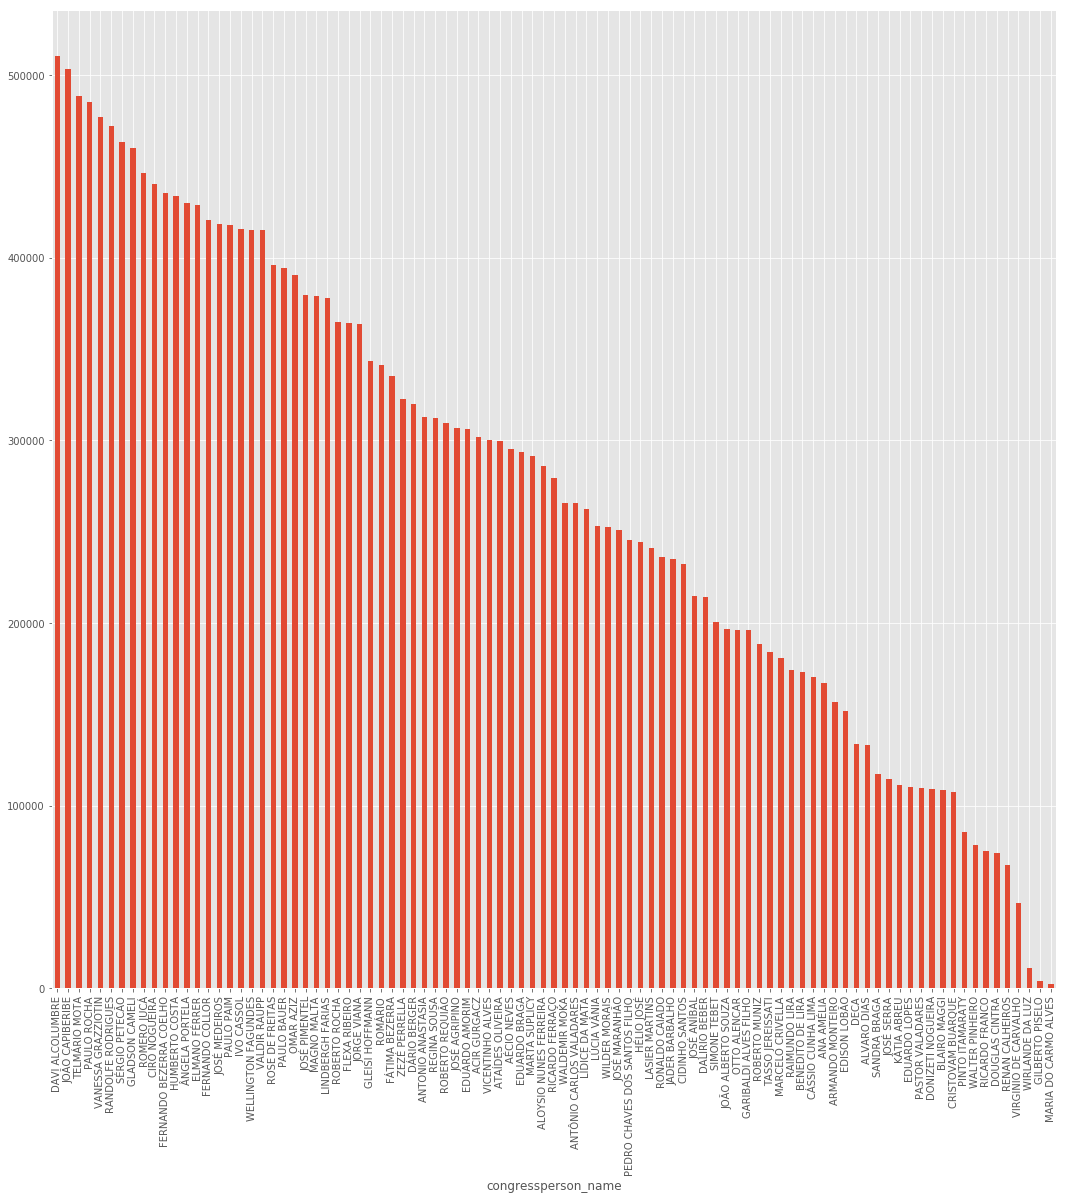

In [38]:
# valores gastos por senador
s = bysenator.reimbursement_value.sum()
s.sort_values(ascending=False).plot.bar(figsize=(18,18))
pyplot.savefig("/dados/gasto_senadores.png")

---------
Esses graficos nos ajudam a ver quais meses nossos senadores gastaram mais e quais senadores gastaram mais/menos.

Visualmente podemos identificar senadores com gastos altissimos e alguns com poquissimo gasto.

Vamos investigar esses casos.

In [39]:
# podemos aplicar uma função para agregar os valores de uma coluna,
# nesse caso, vamos aplicar uma função para ver o range de valores que nossos senadores pediram de reembolso.
def max_min(array):
    return array.max() - array.min()
bysenator.reimbursement_value.agg(max_min)

congressperson_name
ACIR GURGACZ                 19760.00
ALOYSIO NUNES FERREIRA        8260.45
ALVARO DIAS                   2018.25
ANA AMÉLIA                    2751.21
ANTONIO ANASTASIA             6591.31
ANTÔNIO CARLOS VALADARES      5649.17
ARMANDO MONTEIRO              7415.92
ATAÍDES OLIVEIRA             17415.00
AÉCIO NEVES                   8985.00
BENEDITO DE LIRA              3983.27
BLAIRO MAGGI                  7791.20
CIDINHO SANTOS                7992.45
CIRO NOGUEIRA                11955.00
CRISTOVAM BUARQUE            37900.00
CÁSSIO CUNHA LIMA             7489.36
DALIRIO BEBER                 3497.00
DAVI ALCOLUMBRE             256810.00
DECA                          7116.00
DONIZETI NOGUEIRA             5975.00
DOUGLAS CINTRA                4977.13
DÁRIO BERGER                  4840.00
EDISON LOBÃO                 11941.57
EDUARDO AMORIM                3910.00
EDUARDO BRAGA                11970.00
EDUARDO LOPES                32959.51
ELMANO FÉRRER                 

In [40]:
# agora vamos tirar os dados que estão distorcendo nossa distribuição.
clean_outliers = df[(df["reimbursement_value"] < df.reimbursement_value.quantile(0.995))]

In [41]:
clean_outliers.reimbursement_value.describe()

count    26535.000000
mean       826.170997
std       1374.499845
min          0.010000
25%        122.485000
50%        319.260000
75%        936.655000
max      11944.160000
Name: reimbursement_value, dtype: float64

In [42]:
df.reimbursement_value.describe()

count     26691.000000
mean        947.484513
std        2733.820037
min           0.010000
25%         124.000000
50%         324.790000
75%         956.865000
max      256980.000000
Name: reimbursement_value, dtype: float64

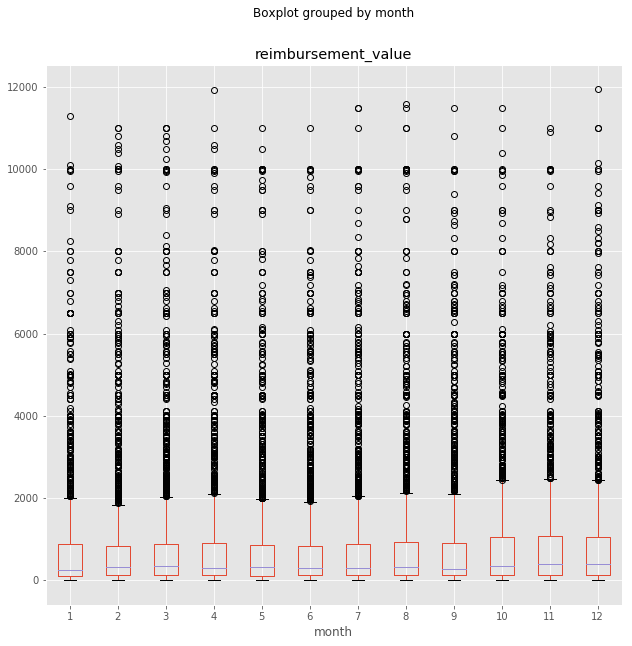

In [43]:
# Vamos ver se os gastos estão mais proximos na distribuição agrupada por mês.
clean_outliers.boxplot(column="reimbursement_value", by="month", figsize=(10,10))

---------
Percentis são valores que agrupam os valores de uma distribuição,

ex: percentil 25 com valor 124, significa que 25% dos dados são iguais ou menores que 124.

Os percentis mais comuns são 25, 50 (mediana), 75. A diferença entre o percentil 25 e 75 é conhecido como interquartil.

In [44]:
# em qual percentil um valor está
def percentil_rank(values, value):
    count = 0
    for v in values:
        if v <= value:
            count += 1
    return 100 * count / len(values)

percentil_rank(df.reimbursement_value, 12000)

99.56539657562475

----------------
Vamos ver os efeitos da limpeza de outliers nos percentis da distribuição.

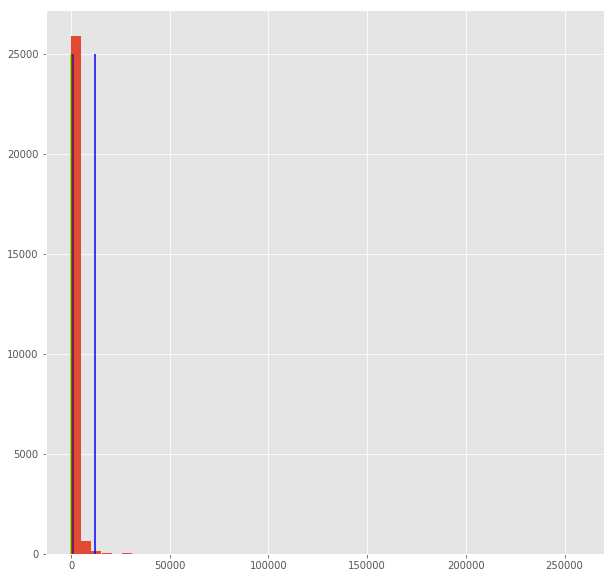

In [45]:
def plot_percentis(dist, top=10000):
    colors = ["black", "yellow", "green", "purple", "blue"]
    percentis = [0.005, 0.25, 0.5, 0.75, 0.995]
    for color, percentil in zip(colors, percentis):
        pyplot.vlines(dist.quantile(percentil), # Plot black line at mean
              ymin=0,
              ymax=top,
              color=color)

df.reimbursement_value.hist(figsize=(10,10), bins=50)
plot_percentis(df.reimbursement_value, 25000)

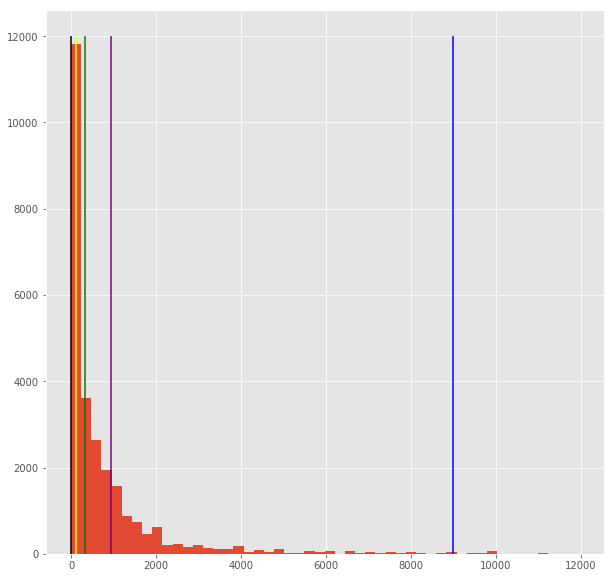

In [46]:
clean_outliers.reimbursement_value.hist(figsize=(10,10), bins=50)
plot_percentis(clean_outliers.reimbursement_value, 12000)

------------

Limpamos os outliers e vimos que a distribuição ficou mais comportada.
Porém, nesse caso, não queremos descarta-los e sim analisa-los para saber o porque gastaram tanto.

In [47]:
outliers = df[df["reimbursement_value"] >= df.reimbursement_value.quantile(0.995)]
outliers.reimbursement_value.describe()
clean_outliers.reimbursement_value.count() + outliers.reimbursement_value.count() == df.reimbursement_value.count()

True

In [48]:
reembolsos_senador = pandas.crosstab(index=outliers["congressperson_name"], columns="qtd_reembolsos")
reembolsos_cnpj_cpf = pandas.crosstab(index=outliers["cnpj_cpf"], columns="qtd_reembolsos")

In [49]:
reembolsos_senador.sort_values(by="qtd_reembolsos", ascending=False)

col_0,qtd_reembolsos
congressperson_name,
FERNANDO COLLOR,20
ÂNGELA PORTELA,13
EDISON LOBÃO,12
TASSO JEREISSATI,11
OMAR AZIZ,11
EDUARDO BRAGA,7
ATAÍDES OLIVEIRA,6
VICENTINHO ALVES,5
CRISTOVAM BUARQUE,5


In [50]:
reembolsos_cnpj_cpf.sort_values(by="qtd_reembolsos", ascending=False)

col_0,qtd_reembolsos
cnpj_cpf,
04.850.792/0001-44,12
146.681.063-72,12
20.647.510/0001-62,11
12.819.071/0001-08,10
22.793.293/0001-44,10
07.880.118/0001-09,8
16.924.825/0001-32,8
06.170.766/0001-09,6
31.350.663/0004-02,4


-------
Agora vamos analisar o gasto por partido e estado dos senadores.

Nós não temos essa informação no dado inicial, mas podemos pega-la em outro arquivo e
fazer um merge entre os dois.

In [51]:
senadores = pandas.read_html("senadores.html", encoding = 'utf8')[0]

In [52]:
senadores.head()

,Unnamed: 0_level_0,Nome,Partido,Início de mandato,Fim de mandato,Obs.
,Acre,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
0,NaN,Gladson Cameli (Gladson de Lima Cameli),PP,2015.0,2023.0,NaN
1,NaN,Jorge Viana (Jorge Ney Viana Macedo Neves),PT,2011.0,2019.0,NaN
2,NaN,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD,2011.0,2019.0,NaN
3,Alagoas,NaN,NaN,NaN,NaN,NaN
4,NaN,Benedito de Lira,PP,2011.0,2019.0,NaN


--------
Nossos dados estão com varios problemas, precisamos trata-los antes de fazer o merge com o nosso dataframe principal.

Vamos então:
* excluir colunas que nao fazem sentido
* renomear as colunas
* normalizar a coluna de estado
* tratar o nome dos senadores pois esse será nosso ponto de merge.

In [53]:
senadores.shape

(107, 6)

In [54]:
del senadores["Início de mandato"]
del senadores["Fim de mandato"]
del senadores["Obs."]

In [55]:
senadores.head()

,Unnamed: 0_level_0,Nome,Partido
,Acre,Unnamed: 1_level_1,Unnamed: 2_level_1
0,NaN,Gladson Cameli (Gladson de Lima Cameli),PP
1,NaN,Jorge Viana (Jorge Ney Viana Macedo Neves),PT
2,NaN,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD
3,Alagoas,NaN,NaN
4,NaN,Benedito de Lira,PP


In [56]:
senadores.rename(columns={"Unnamed: 0_level_0": "estado", "Nome": "nome", "Partido": "partido"}, inplace=True)

In [57]:
estado = "Acre"
for i, row in senadores.iterrows():
    if pandas.isnull(row["estado"][0]):
        senadores.loc[i]["estado"] = estado
    else:
        estado = row["estado"][0]

In [58]:
senadores.dropna(inplace=True)

In [59]:
senadores.columns = ['estado', 'nome', 'partido']

In [60]:
senadores.nome = senadores.nome.str.replace(r"\s\(.*\)", "").str.upper()

In [61]:
senadores.head()

,estado,nome,partido
0,Acre,GLADSON CAMELI,PP
1,Acre,JORGE VIANA,PT
2,Acre,SÉRGIO PETECÃO,PSD
4,Alagoas,BENEDITO DE LIRA,PP
5,Alagoas,FERNANDO COLLOR,PTC


-----------
Agora com os dados tratados podemos fazer nosso merge e começar as analises.

In [63]:
suplentes = pandas.read_html("suplentes.html", encoding='utf-8')[0]
suplentes.head()

,Unnamed: 0,Nome,Partido,Estado,Titular,Período(s) exercido(s),Obs.
0,NaN,Deca Sobrinho (José Gonzaga Sobrinho),PSDB,Paraíba,Cássio Cunha Lima,2015 - 2016,Primeiro suplente
1,NaN,Donizeti Nogueira (Divino Donizeti Borges Nogu...,PT,Tocantins,Kátia Abreu,2015-2016,Primeiro suplente
2,NaN,Douglas Cintra (Douglas Mauricio Ramos Cintra),PTB,Pernambuco,Armando Monteiro,2015-2016,Primeiro suplente
3,NaN,Fernando Ribeiro (Fernando de Castro Ribeiro),PMDB,Pará,Jader Barbalho,2015,Primeiro suplente
4,NaN,Gilberto Piselo (Gilberto Piselo do Nascimento),PDT,Rondônia,Acir Gurgacz,2016,Primeiro suplente


In [64]:
del suplentes["Unnamed: 0"]
del suplentes["Titular"]
del suplentes["Período(s) exercido(s)"]
del suplentes["Obs."]
suplentes.head()

,Nome,Partido,Estado
0,Deca Sobrinho (José Gonzaga Sobrinho),PSDB,Paraíba
1,Donizeti Nogueira (Divino Donizeti Borges Nogu...,PT,Tocantins
2,Douglas Cintra (Douglas Mauricio Ramos Cintra),PTB,Pernambuco
3,Fernando Ribeiro (Fernando de Castro Ribeiro),PMDB,Pará
4,Gilberto Piselo (Gilberto Piselo do Nascimento),PDT,Rondônia


In [65]:
suplentes.columns = ['nome', 'partido', "estado"]
suplentes.nome = suplentes.nome.str.replace(r"\s\(.*\)", "").str.upper()
suplentes.head()

,nome,partido,estado
0,DECA SOBRINHO,PSDB,Paraíba
1,DONIZETI NOGUEIRA,PT,Tocantins
2,DOUGLAS CINTRA,PTB,Pernambuco
3,FERNANDO RIBEIRO,PMDB,Pará
4,GILBERTO PISELO,PDT,Rondônia


In [73]:
senadores = pandas.concat([senadores, suplentes])
senadores = senadores.reset_index(drop=True)
len(senadores)

107

In [71]:
df = df.merge(senadores, how="left", left_on="congressperson_name", right_on="nome")
df.info()
# dist plot de dois anos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26691 entries, 0 to 26690
Data columns (total 13 columns):
year                   26691 non-null int64
month                  26691 non-null int64
congressperson_name    26691 non-null object
expense_type           26691 non-null object
cnpj_cpf               26691 non-null object
supplier               26691 non-null object
document_id            26691 non-null object
date                   26691 non-null object
expense_details        26691 non-null object
reimbursement_value    26691 non-null float64
estado                 23865 non-null object
nome                   23865 non-null object
partido                23865 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 2.9+ MB


In [72]:
df.document_id.fillna(0, inplace=True)
df.expense_details.fillna("0", inplace=True)
del df["nome"]

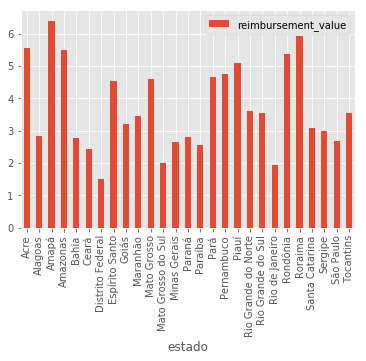

In [81]:
por_estado = df.groupby("estado")
gasto_estado = por_estado.agg({"reimbursement_value": "sum"})
gasto_estado_percent = gasto_estado.apply(lambda x: 100 * x / float(x.sum()))
gasto_estado_percent.plot.bar()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


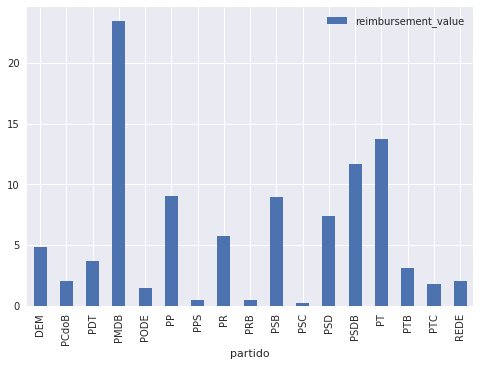

In [102]:
por_partido = df.groupby("partido")
gasto_partido = por_partido.agg({"reimbursement_value": "sum"})
gasto_partido_percent = gasto_partido.apply(lambda x: 100 * x / float(x.sum()))
gasto_partido_percent.plot.bar()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


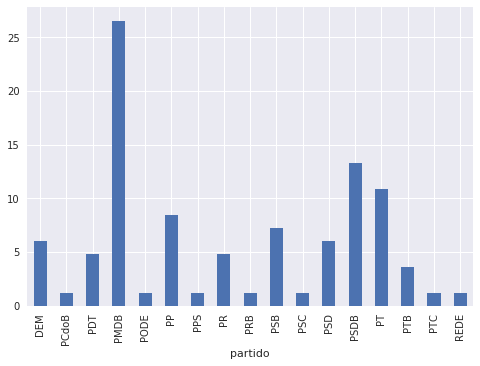

In [103]:
partidos = por_partido.congressperson_name.unique()
qtd_partido = partidos.aggregate(lambda x: len(x))
qtd_partido_percent = qtd_partido.apply(lambda x: 100 * x / float(qtd_partido.sum()))
qtd_partido_percent.plot.bar()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


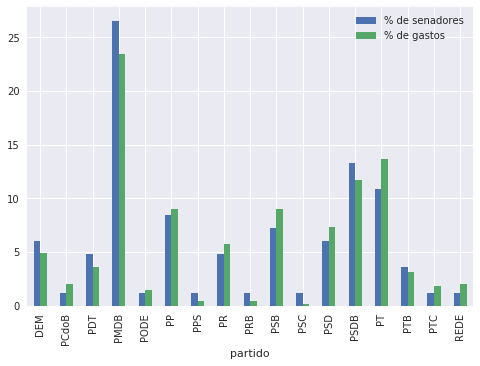

In [130]:
#gasto por partido / quantidade de senadores em cada partido.
qtd_partido_df = qtd_partido_percent.to_frame()
ndf = pandas.concat([qtd_partido_df, gasto_partido_percent], axis=1)
ndf = ndf.rename(columns={"congressperson_name": "% de senadores", "reimbursement_value": "% de gastos"})
ndf.plot.bar()

---------------

## Proximos passos
Com essas tecnicas podemos fazer uma analise dos dados do senado e tirar algumas conclusões.

Agora podemos pegar os dados dos anos anteriores e compara-los com os desse ano. :)